## Pandas Veri Görsellestirme

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
pd.to_datetime("2025-09-05") #Timestamp('2025-09-05 00:00:00')

#----
ind = pd.date_range(start='2025-01-01',end="2025-01-15", freq='D') # freq='D' gün bazlı zaman üretir

#
df = pd.DataFrame(data = {
                    "A":np.random.randint(0,1000, len(ind)),
                    "B":np.random.randint(0,1000, len(ind))
                        },
                        index = ind)
df.head()

,A,B
2025-01-01,665,420
2025-01-02,642,408
2025-01-03,691,939
2025-01-04,977,829
2025-01-05,516,84


<Axes: xlabel='A', ylabel='B'>

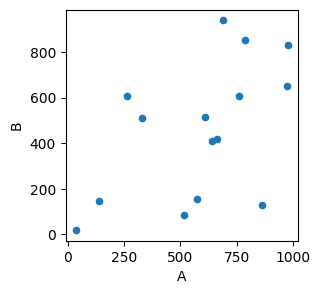

In [3]:
#df.plot.grafik
#df.plot(kind=grafik)
#df.grafik
df.plot() #indexi x ekseninde, kolonları da iki ayrı seri yaptı.

#
plt.close("all") #buraya açık olan grafikler kapansın

#
df.plot(x="A", y="B", kind="scatter",figsize=(3,3)) #x eksenine A, y eksenine B
#df.plot.scatter(x="A", y="B") #aynı grafiği elde edebiliriz.

<Axes: >

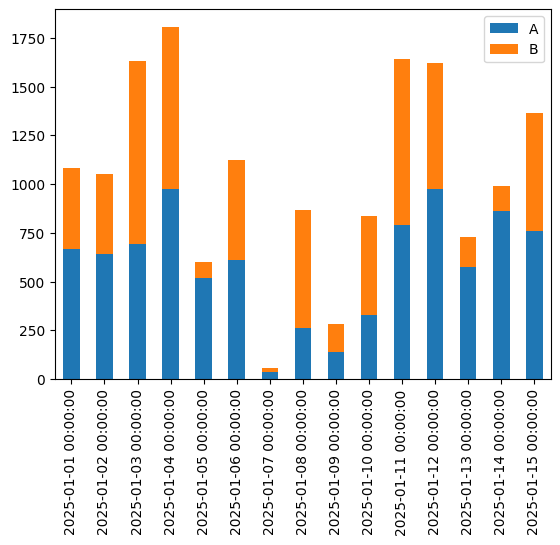

In [4]:
df.plot.bar(stacked=True) #üst üst bar grafik

<Axes: >

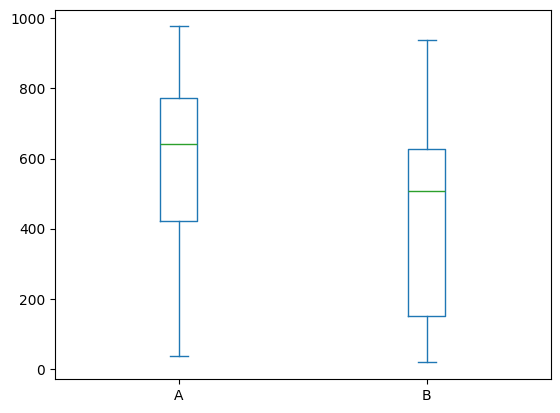

In [5]:
df.plot.box()

In [6]:
df["C"] = df.A * df.B /0.026

df.head()

,A,B,C
2025-01-01,665,420,1.074231e+07
2025-01-02,642,408,1.007446e+07
2025-01-03,691,939,2.495573e+07
2025-01-04,977,829,3.115127e+07
2025-01-05,516,84,1.667077e+06


<Axes: xlabel='A', ylabel='C'>

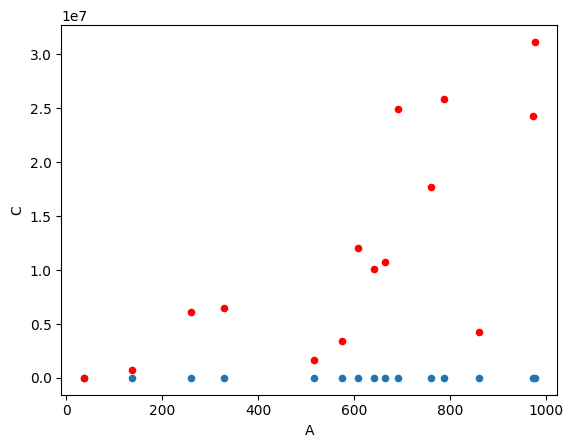

In [7]:
ax = df.plot.scatter(x="A",y="B") #çizim alanı tutalım
df.plot.scatter(x="A",y="C", ax=ax, color='red')

## Tarihsel Bazı İşlemler

In [8]:
#dfc = df.reset_index()
#dfc = dfc.rename(columns={"index":"Tarih"})

#dt tarih modulu mevcut.
dfc.Tarih.dt.year
dfc.Tarih.dt.strftime("%A") #gün adı

NameError: name 'dfc' is not defined

In [ ]:
ind = pd.date_range(start='2025-01-01',end="2025-12-31", freq='D') # freq='D' gün bazlı zaman üretir

#
dfm = pd.DataFrame(data = {
                    "A":np.random.randint(0,1000, len(ind)),
                    "B":np.random.randint(0,1000, len(ind))
                        },
                        index = ind)
dfm.head()

,A,B
2025-01-01,925,948
2025-01-02,610,398
2025-01-03,50,612
2025-01-04,141,865
2025-01-05,704,417


### Resample ile zaman bazlı gruplama yapılabilir

In [ ]:
#dfm.groupby(by)

#
#dfm.resample("M").mean()

#
dfm.resample("ME").agg({"A":["count","max","min"],
                       "B":["max","min"]}).to_period(freq="M")

#.to_period(freq="M") ile tarih alanının periyodu gösteriyoruz.

A              B     
        count  max  min  max  min
2025-01    31  949   26  982    0
2025-02    28  990    1  991   49
2025-03    31  960   63  992    7
2025-04    30  997   59  970    0
2025-05    31  939   19  994   40
2025-06    30  984   10  937   26
2025-07    31  961   20  988  113
2025-08    31  991  134  980   36
2025-09    30  998   12  991   32
2025-10    31  990  134  949   18
2025-11    30  970    0  967   20
2025-12    31  989  129  974   30